# Schwinger Effect

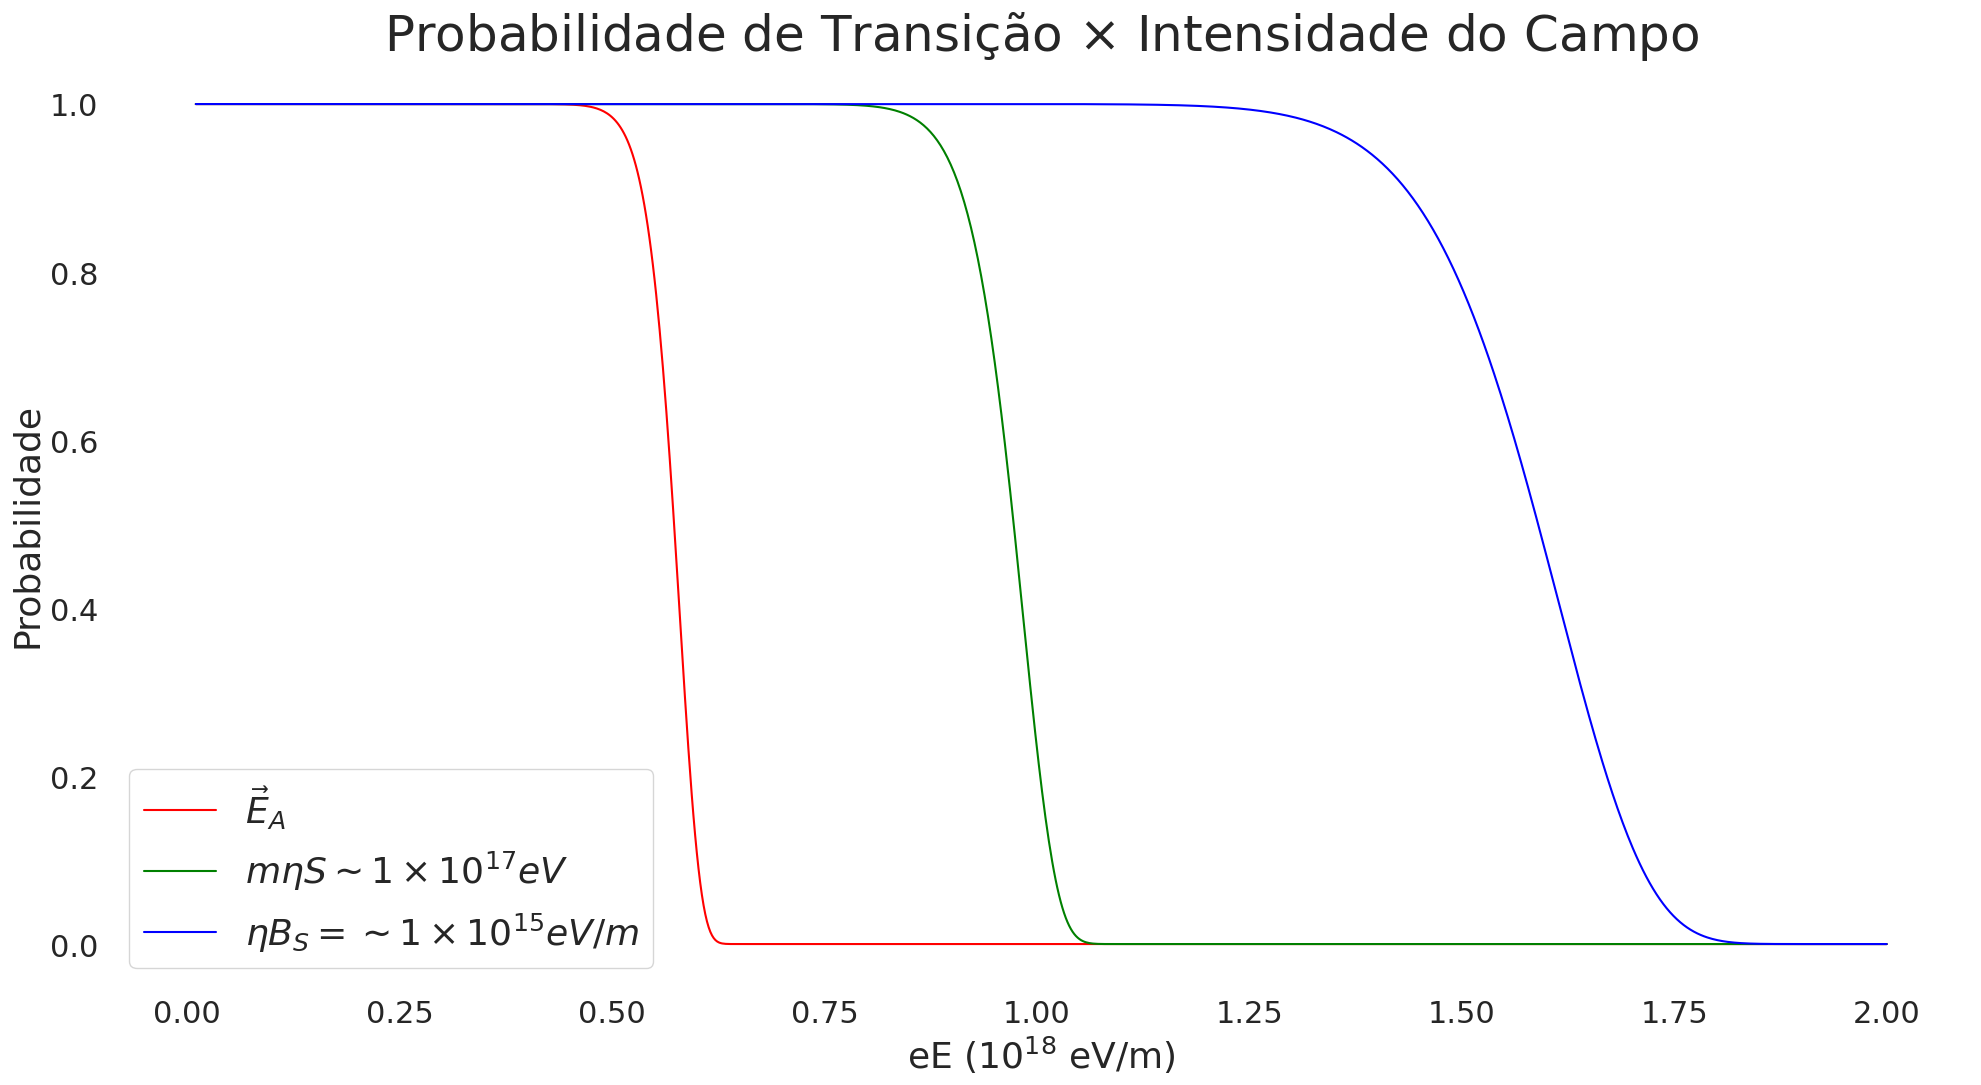

In [ ]:
# Autor: Lucas Pereira de Souza

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spence # Importa a função dilogaritmo
import seaborn as sns
sns.set_theme(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})#rc={'axes.facecolor':'ghostwhite', 'figure.facecolor':'ghostwhite'})

def zetaconst(m2,m2s2,eE,n):
  c = 2.99e8 # Velocidade da luz
  h = 6.58e-16 # Constante de Planck
  h2 = 4.33e-31 # Constante de Planck ao quadrado
  k = 1
  termo = 0
  if c*c*(1.0 - m2s2*137.0/(h2*eE*eE))<=0.0:
    return 0.0
  else:
    while k < n:
      termo = termo + (((-1.0)**k)/(k*k))*np.cos(k*np.pi*np.sqrt(1.0 - c*c*m2s2*137.0/(h2*eE*eE)))*np.exp(-np.sqrt(137.0)*np.pi*k*m2/(2.0*c*h*eE))
      k = k+1
  return termo

def zetadyn(nB,m2,m2s2,eE,n):
  c = 2.99e8 # Velocidade da luz
  h = 6.58e-16 # Constante de Planck
  h2 = 4.33e-31 # Constante de Planck ao quadrado
  k = 1
  termo = 0
  if 1.0 + 137.0*c*c*(nB*nB - 4.0*m2s2)/(4.0*h2*eE*eE)<=0.0:
      termo = 0.0
      return termo
  else:
    while k < n:
      termo = termo + (((-1.0)**k)/(k*np.sinh(np.sqrt(137.0)*np.pi*k*nB/(2.0*c*h*eE))))*np.cos(k*np.pi*np.sqrt(1.0 + 137.0*c*c*(nB*nB - 4.0*m2s2)/(4.0*h2*eE*eE)))*np.exp(-np.sqrt(137.0)*np.pi*k*m2/(2.0*c*h*eE))
      k = k+1
    return termo

def zetabig(m2,nB,eE,n):
  c = 2.99e8 # Velocidade da luz
  h = 6.58e-16 # Constante de Planck
  h2 = 4.33e-31 # Constante de Planck ao quadrado
  k = 1
  termo = 0
  while k < n:
    termo = termo + (((-1.0)**k)/(k*np.sinh(np.sqrt(137.0)*np.pi*k*nB/(2.0*c*h*eE))))*np.cos(np.sqrt(137.0)*c*k*np.pi/(2.0*h*eE))*np.exp(-np.sqrt(137.0)*np.pi*k*m2/(2.0*c*h*eE))
    if termo <= 0.0:
      return 0.0
    k = k+1
  return termo

melec = 5.11e5 # massa do elétron
melec2 = 2.61e11 # massa do elétron ao quadrado
T = 1.0e-14 # Tempo do pulso de laser
l = 1.0e-10 # Comprimento de onda do laser
TV = T*(l**3) # volume do espaço tempo
pot = 1e18 # Ordem de grandeza do campo
pot2 = 1e36 # Ordem de grandeza ao quadrado
pi3 = np.pi**3 # Pi ao cubo
pi2 = np.pi**2 # Pi quadrado
c = 2.99e8 # Velocidade da luz
h = 6.58e-16 # Constante de Planck
h2 = 4.33e-31 # Constante de Planck ao quadrado
eE = np.linspace(0.01,2.0,1000) # produto da carga com o campo (vai de 0 a 1 multiplicando a potência)
nB = 1e-14
nBdom = 1
m2s2 = 1e-24
bigm2S2 = 1e-20
prob = [] # Probabilidade para o Campo Elétrico
probSconst = [] # Probabilidade para vetor axial constante
probSdyn = [] # Probabilidade para vetor axial dinâmico
ProbbigS = [] # Probabilidade para vetor axial 'forte'
for j in eE:
  G = np.exp((-(TV*j*j*pot2)/(c*h2*pi2*137.0))*(spence(1.0-np.exp(-np.sqrt(np.pi)*melec2/(np.sqrt(4.0/137.0)*c*h*j*pot))))) # Taxa de produção de pares
  prob.append(G) # Anexa a probabilidade para um dado j
  GSconst = np.exp((-(TV*j*j*pot2)/(c*h2*pi2*137.0))*zetaconst(melec2,m2s2,j*pot,2)) # Taxa de produção de pares
  probSconst.append(GSconst) # Anexa a probabilidade para um dado j
  GSdyn = np.exp((-(TV*j*nB*pot2)/(c*h*np.pi*137.0))*zetadyn(nB,melec2,bigm2S2,j*pot,2))
  probSdyn.append(GSdyn)
  #GSbig = np.exp((-(TV*j*nBdom*pot)/(c*h*np.pi*137.0))*zetabig(melec2,nBdom,j*pot,2))
  #ProbbigS.append(GSbig)

# Gera o gráfico
plt.figure(1, figsize=(24,12))
plt.plot(eE, prob, label={r'$\vec{E}_A$'}, color='red')
plt.plot(eE, probSconst, label=(r'$m \eta S \sim 1\times10^{17} eV$'), color='green')
plt.plot(eE, probSdyn, label=(r'$\eta B_S = \sim 1\times10^{15} eV/m$'), color='blue')
#plt.plot(eE, ProbbigS, label=(r'$B_S = 10\times10^{18} eV/m$'))
plt.legend(loc='lower left', fontsize=26)
plt.title(r'Probabilidade de Transição $\times$ Intensidade do Campo', fontsize=36)
plt.xlabel(r'eE ($10^{18}$ eV/m)', fontsize=26)
plt.ylabel(r'Probabilidade', fontsize=26)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spence # Importa a função dilogaritmo
import seaborn as sns
sns.set_theme(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})#rc={'axes.facecolor':'ghostwhite', 'figure.facecolor':'ghostwhite'})

mplanck = 1.2209e19  # massa do elétron
melec2 = 2.61e11 # massa do elétron ao quadrado
T = 1.0e-14 # Tempo do pulso de laser
l = 1.0e-10 # Comprimento de onda do laser
TV = T*(l**3) # volume do espaço tempo
pot = 1e18 # Ordem de grandeza do campo
pot2 = 1e36 # Ordem de grandeza ao quadrado
pi3 = np.pi**3 # Pi ao cubo
pi2 = np.pi**2 # Pi quadrado
c = 2.99e8 # Velocidade da luz
h = 6.58e-16 # Constante de Planck
h2 = 4.33e-31 # Constante de Planck ao quadrado
eE = np.linspace(0.01,2.0,1000) # produto da carga com o campo (vai de 0 a 1 multiplicando a potência)
nB = 1e-14
nBdom = 1
m2s2 = 1e-24
bigm2S2 = 1e-20
prob = [] # Probabilidade para o Campo Elétrico
probSconst = [] # Probabilidade para vetor axial constante
probSdyn = [] # Probabilidade para vetor axial dinâmico
ProbbigS = [] # Probabilidade para vetor axial 'forte'
for j in eE:
  G = np.exp((-(TV*j*j*pot2)/(c*h2*pi2*137.0))*(spence(1.0-np.exp(-np.sqrt(np.pi)*melec2/(np.sqrt(4.0/137.0)*c*h*j*pot))))) # Taxa de produção de pares
  prob.append(G) # Anexa a probabilidade para um dado j
  GSconst = np.exp((-(TV*j*j*pot2)/(c*h2*pi2*137.0))*zetaconst(melec2,m2s2,j*pot,2)) # Taxa de produção de pares
  probSconst.append(GSconst) # Anexa a probabilidade para um dado j
  GSdyn = np.exp((-(TV*j*nB*pot2)/(c*h*np.pi*137.0))*zetadyn(nB,melec2,bigm2S2,j*pot,2))
  probSdyn.append(GSdyn)
  #GSbig = np.exp((-(TV*j*nBdom*pot)/(c*h*np.pi*137.0))*zetabig(melec2,nBdom,j*pot,2))
  #ProbbigS.append(GSbig)

# Gera o gráfico
plt.figure(1, figsize=(24,12))
plt.plot(eE, prob, label={r'$\vec{E}_A$'}, color='red')
plt.plot(eE, probSconst, label=(r'$m \eta S \sim 1\times10^{17} eV$'), color='green')
plt.plot(eE, probSdyn, label=(r'$\eta B_S = \sim 1\times10^{15} eV/m$'), color='blue')
#plt.plot(eE, ProbbigS, label=(r'$B_S = 10\times10^{18} eV/m$'))
plt.legend(loc='lower left', fontsize=26)
plt.title(r'Probabilidade de Transição $\times$ Intensidade do Campo', fontsize=36)
plt.xlabel(r'eE ($10^{18}$ eV/m)', fontsize=26)
plt.ylabel(r'Probabilidade', fontsize=26)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.show()

# Prova de Conceito: Torção Primordial e Assimetria Matéria x Anti-Matéria

/tmp/ipython-input-189-1259599078.py:48: RuntimeWarning: overflow encountered in exp
  exps = np.exp(ks * np.pi * S / E)


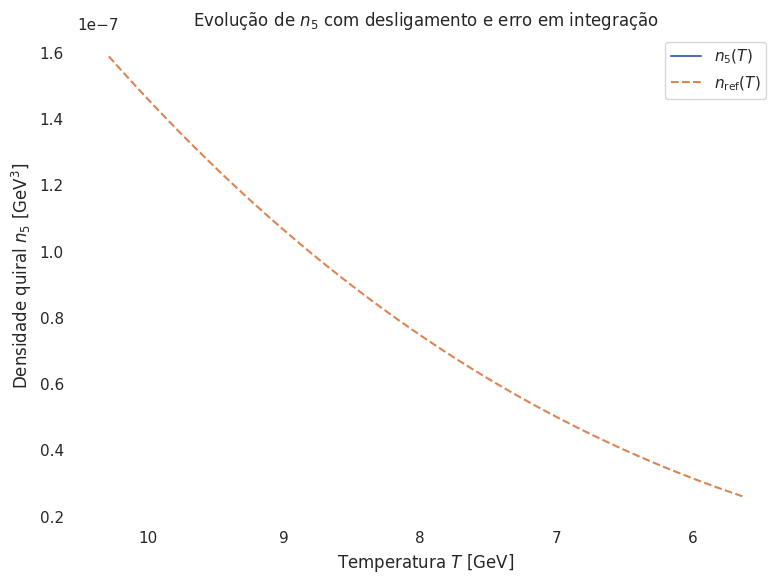

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import zeta
import seaborn as sns
sns.set_theme(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})#rc={'axes.facecolor':'ghostwhite', 'figure.facecolor':'ghostwhite'})

# --- constantes e parâmetros ---
Mpl         = 1.22e19        # escala de Planck [GeV]
hbar_c      = 6.582e-25      # ħ em GeV·s
g_star_high = 106.75         # graus de liberdade acima do eletrofrio
S0_initial  = 1.0         # amplitude inicial do campo axial S_z
# Função g_star(T) para diferentes regimes (exemplo simplificado)
def g_star(T):
    return 106.75 if T>100 else 10.75  # placeholder: acima de 100 GeV e abaixo

delta      = 1e-10          # tolerância para saturar S e E_s perto de 100 GeV
t_off      = 1.0e2          # GeV: temperatura de "desligamento"
eta_B       = 6e-10          # assimetria baryônica
alpha       = 0.75            # fração de dissipação do termo S0 * Gamma
k_max       = 4              # truncamento do somatório
const_M     = 1e-15           # Constante que multiplica Mpl
M_torsion   = const_M * Mpl   # Massa do campo de torção [GeV]

# Mapeamento T <-> t em radiação dominante, com g_star variável

def t_of_T(T):
    return 0.301/np.sqrt(g_star(T)) * Mpl / T**2 * hbar_c

def T_of_t(t, T_init, t_init):
    return T_init * (t_init / t)**0.5

# Hubble em unidades de 1/s

def H(T):
    return (1.66 * np.sqrt(g_star(T)) * T**2 / Mpl) / hbar_c

# densidade de fótons de referência

def n_gamma(T):
    return 2 * zeta(3) / np.pi**2 * T**3

# produção de pares (limite m->0) truncada

def Gamma_prod(S, E, k_max, T):
    if E <= 1e-20: # or T <= 1e-10:
        return 0.0
    ks = np.arange(1, k_max+1)
    exps = np.exp(ks * np.pi * S / E)
    phases = np.cos(ks * np.pi * np.sqrt(1 + 4*S**2 / E**2))
    terms = ((-1)**ks / ks**2) * phases * exps
    if S > 0:
      tang = np.tan(np.sqrt(S)/T)
    else:
      tang = 1
    return (E**2/(4*np.pi**3)) * np.sum(terms) * tang

# Evolução por loop de tempo (Euler) e estimação de erro simples

def evolve_n5(T_initial, T_final, n5_initial, E_s_initial, Sz_initial, M, k_max, Nsteps=5700):
    # condições iniciais
    t_init = t_of_T(T_initial)
    # malha de tempo uniforme em log
    #t_vals = np.linspace(np.log10(t_init), np.log10(t_of_T(T_final)), Nsteps)
    t_vals = np.linspace(t_init, t_of_T(T_final), Nsteps)

    # arrays
    n5 = np.zeros(Nsteps)
    nref = np.zeros(Nsteps)
    E_s = np.zeros(Nsteps)
    Sz  = np.zeros(Nsteps)
    S0  = np.zeros(Nsteps)

    # condições iniciais
    n5[0]  = n5_initial
    E_s[0] = E_s_initial
    Sz[0]  = Sz_initial
    S0[0]  = 0.0

    for i in range(1, Nsteps):
        dt = t_vals[i] - t_vals[i-1]
        T_prev = T_of_t(t_vals[i-1], T_initial, t_init)
        H_prev = H(T_prev)

        # calibra desligamento do setor axial perto de t_off
        switch_off = (T_prev <= t_off)

        # produção de pares
        S2 = max(Sz[i-1]**2 - S0[i-1]**2,0)
        Gamma = 0.0 if switch_off else Gamma_prod(S2, E_s[i-1], k_max, T_prev)

        # n5 evolução
        dn5 = Gamma - 3*H_prev * n5[i-1]
        n5[i] = n5[i-1] + dn5 * dt

        # S0 evolução
        dS0 = 0.0 if switch_off else n5[i-1]
        S0[i] = S0[i-1] + dS0 * dt

        # dissipação axial -> eletromagnético
        if not switch_off:
            E_diss = alpha * S0[i-1] * Gamma * dt
            Sz2 = max(Sz[i-1]**2 - 2*E_diss/M**2, 0.0)
        else:
            Sz2 = 0.0 #max(Sz[i-1]**2 - delta, 0.0)
        Sz[i] = np.sqrt(Sz2)

        # E_s evolução pelo acoplamento de Proca
        dEs = 0.0 if switch_off else M**2 * Sz[i]
        E_s[i] = E_s[i-1] + dEs * dt

        # densidade de referência
        nref[i] = eta_B * n_gamma(T_prev)

    # converte t -> T para plot
    T_vals = T_of_t(t_vals, T_initial, t_init)
    return T_vals, n5, nref

# Estimativa simples de erro máximo comparando duas malhas

def estimate_error(*args, N1=100000, N2=110000):
    T1, sol1, _ = evolve_n5(*args, Nsteps=N1)
    T2, sol2, _ = evolve_n5(*args, Nsteps=N2)
    # interpola sol2 em T1
    sol2_interp = np.interp(T1, T2[::-1], sol2[::-1])
    return np.max(np.abs(sol1 - sol2_interp))

# Parâmetros e execução
T_i, T_f = M_torsion, 1e1
T_vals, n5_vals, nref = evolve_n5(T_i, T_f, n5_initial=0.0001,
                                  E_s_initial=0.001, Sz_initial=S0_initial,
                                  M=M_torsion, k_max=k_max, Nsteps=100000)
#err_max = estimate_error(T_i, T_f, 0.0, 0.0, S0_initial, M_torsion, k_max)
#print(f"Erro máximo estimado: {err_max:.2e}")

# plot
plt.figure(figsize=(8,6))
plt.plot(T_vals[-70000:], n5_vals[-70000:], label=r'$n_5(T)$')
plt.plot(T_vals[-70000:], nref[-70000:],'--', label=r'$n_{\rm ref}(T)$')
#plt.loglog(T_vals[-600000:], n5_vals[-600000:], label=r'$n_5(T)$')
#plt.loglog(T_vals[-600000:], nref[-600000:],'--', label=r'$n_{\rm ref}(T)$')
plt.xlabel('Temperatura $T$ [GeV]')
plt.ylabel('Densidade quiral $n_5$ [GeV$^3$]')
plt.title('Evolução de $n_5$ com desligamento e erro em integração')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

Erro máximo estimado: 6.16e+66


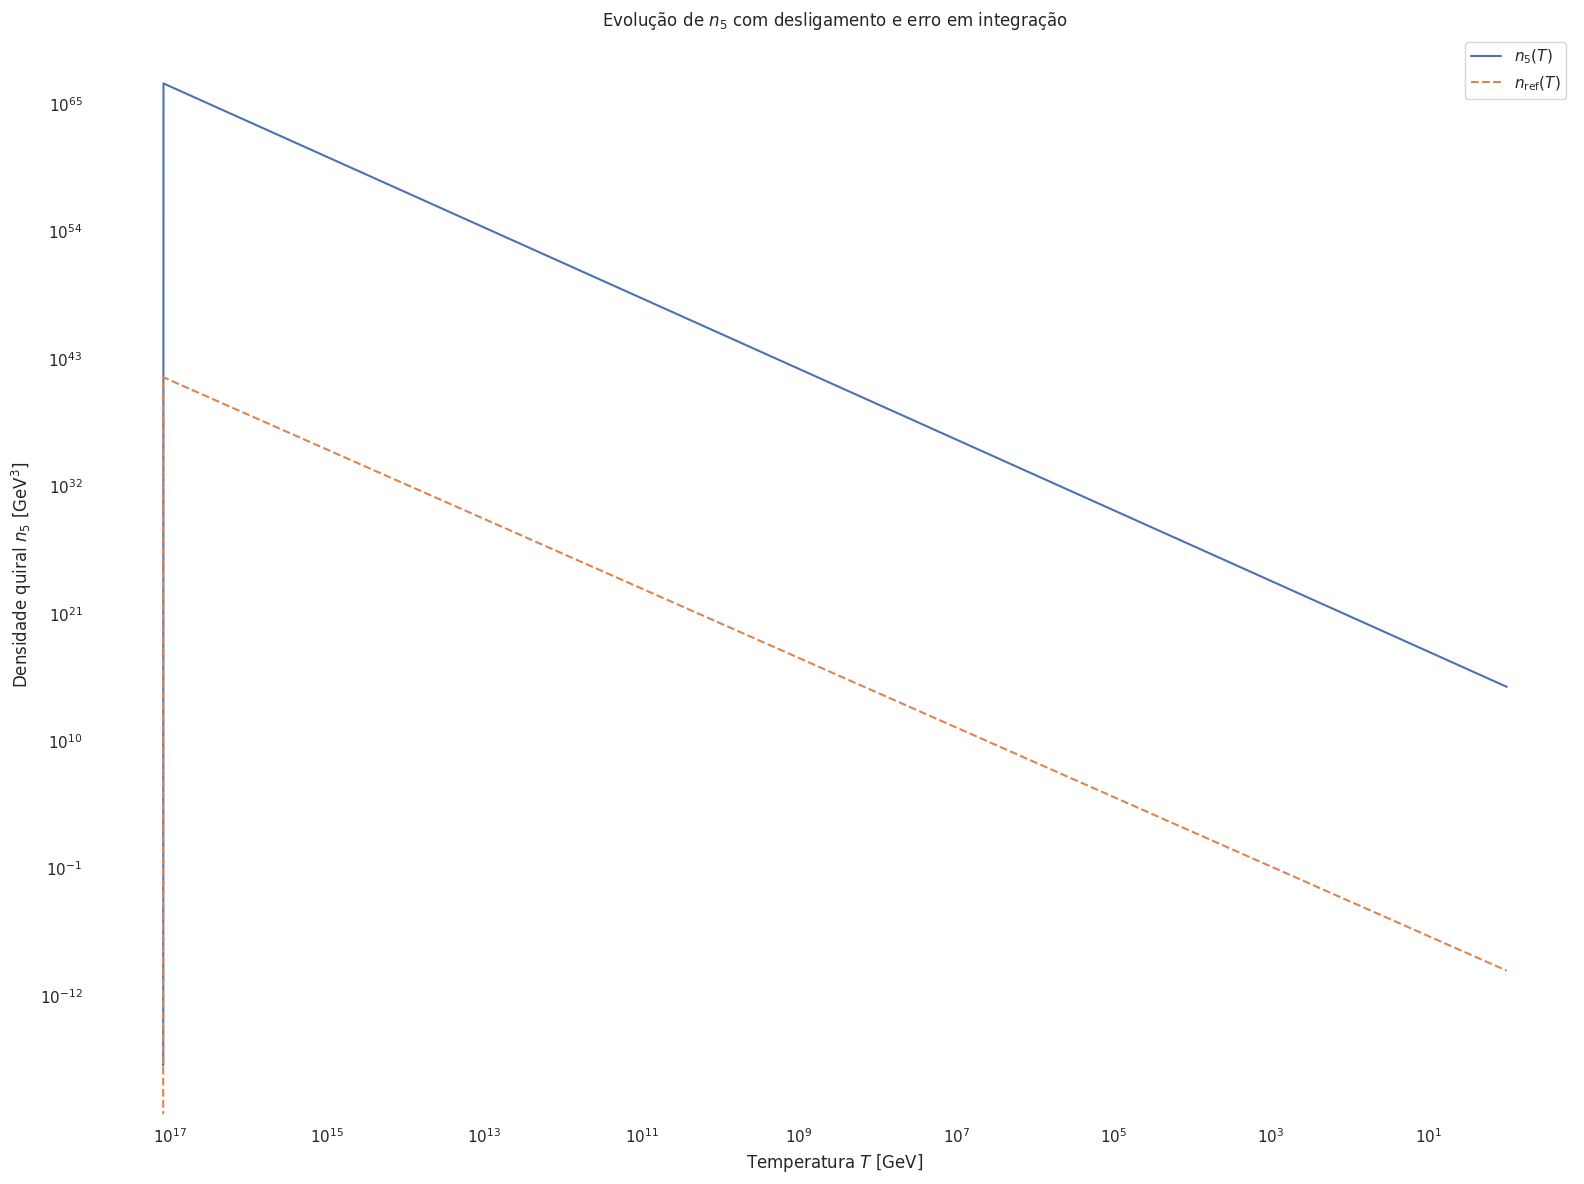

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import zeta
import seaborn as sns
sns.set_theme(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})#rc={'axes.facecolor':'ghostwhite', 'figure.facecolor':'ghostwhite'})

# --- constantes e parâmetros ---
Mpl         = 1.22e19        # escala de Planck [GeV]
hbar_c      = 6.582e-25      # ħ em GeV·s
g_star_high = 106.75         # graus de liberdade acima do eletrofrio
S0_initial  = 1.0e-7           # amplitude inicial do campo axial S_z
# Função g_star(T) para diferentes regimes (exemplo simplificado)
def g_star(T):
    return 106.75 #if T>100 else 10.75  # placeholder: acima de 100 GeV e abaixo

delta      = 1e-10          # tolerância para saturar S e E_s perto de 100 GeV
t_off      = 1.0e2          # GeV: temperatura de "desligamento"
eta_B       = 6e-10          # assimetria baryônica
alpha       = 0.5            # fração de dissipação do termo S0 * Gamma
k_max       = 4              # truncamento do somatório
const_M     = 1e-2           # Constante que multiplica Mpl
M_torsion   = const_M * Mpl   # Massa do campo de torção [GeV]

# Mapeamento T <-> t em radiação dominante, com g_star variável

def t_of_T(T):
    return 0.301/np.sqrt(g_star(T)) * Mpl / T**2 * hbar_c

def T_of_t(t, T_init, t_init):
    return T_init * (t_init / t)**0.5

# Hubble em unidades de 1/s

def H(T):
    return (1.66 * np.sqrt(g_star(T)) * T**2 / Mpl) / hbar_c

# densidade de fótons de referência

def n_gamma(T):
    return 2 * zeta(3) / np.pi**2 * T**3

# produção de pares (limite m->0) truncada

def Gamma_prod(S, E, k_max, T):
    if E <= 0.999e-16: # or T <= 1e-10:
        return 0.0
    ks = np.arange(1, k_max+1)
    exps = np.exp(ks * np.pi * S / E)
    phases = np.cos(ks * np.pi * np.sqrt(1 + 4*S**2 / E**2))
    terms = ((-1)**ks / ks**2) * phases * exps
    if S > 0:
      tang = np.tan(np.sqrt(S)/T)
    else:
      tang = 0
    return (E**2/(4*np.pi**3)) * np.sum(terms) * tang

# Evolução por loop de tempo (Euler) e estimação de erro simples

def evolve_n5(T_initial, T_final, n5_initial, E_s_initial, Sz_initial, M, k_max, Nsteps=5700):
    # condições iniciais
    t_init = t_of_T(T_initial)
    # malha de tempo uniforme em log
    t_vals = np.logspace(np.log10(t_init), np.log10(t_of_T(T_final)), Nsteps)

    # arrays
    n5 = np.zeros(Nsteps)
    nref = np.zeros(Nsteps)
    E_s = np.zeros(Nsteps)
    Sz  = np.zeros(Nsteps)
    S0  = np.zeros(Nsteps)

    # condições iniciais
    n5[0]  = n5_initial
    E_s[0] = E_s_initial
    Sz[0]  = Sz_initial
    S0[0]  = 0.0

    for i in range(1, Nsteps):
        dt = t_vals[i] - t_vals[i-1]
        T_prev = T_of_t(t_vals[i-1], T_initial, t_init)
        H_prev = H(T_prev)

        # calibra desligamento do setor axial perto de t_off
        switch_off = (T_prev <= t_off)

        # produção de pares
        S2 = Sz[i-1]**2 - S0[i-1]**2
        Gamma = 0.0 if switch_off else Gamma_prod(S2, E_s[i-1], k_max, T_prev)

        # n5 evolução
        dn5 = Gamma - 3*H_prev * n5[i-1]
        n5[i] = n5[i-1] + dn5 * dt

        # S0 evolução
        dS0 = 0.0 if switch_off else n5[i-1]
        S0[i] = S0[i-1] + dS0 * dt

        # dissipação axial -> eletromagnético
        if not switch_off:
            E_diss = alpha * S0[i-1] * Gamma * dt
            Sz2 = max(Sz[i-1]**2 - 2*E_diss/M**2, 0.0)
        else:
            Sz2 = 0.0 #max(Sz[i-1]**2 - delta, 0.0)
        Sz[i] = np.sqrt(Sz2)

        # E_s evolução pelo acoplamento de Proca
        dEs = 0.0 if switch_off else M**2 * Sz[i]
        E_s[i] = E_s[i-1] + dEs * dt

        # densidade de referência
        nref[i] = eta_B * n_gamma(T_prev)

    # converte t -> T para plot
    T_vals = T_of_t(t_vals, T_initial, t_init)
    return T_vals, n5, nref

# Estimativa simples de erro máximo comparando duas malhas

def estimate_error(*args, N1=5600, N2=5700):
    T1, sol1, _ = evolve_n5(*args, Nsteps=N1)
    T2, sol2, _ = evolve_n5(*args, Nsteps=N2)
    # interpola sol2 em T1
    sol2_interp = np.interp(T1, T2[::-1], sol2[::-1])
    return np.max(np.abs(sol1 - sol2_interp))

# Parâmetros e execução
T_i, T_f = M_torsion, 1.0
T_vals, n5_vals, nref = evolve_n5(T_i, T_f, n5_initial=1e-18,
                                  E_s_initial=0.0, Sz_initial=S0_initial,
                                  M=M_torsion, k_max=k_max, Nsteps=5700)
err_max = estimate_error(T_i, T_f, 0.0, 0.0, S0_initial, M_torsion, k_max)
print(f"Erro máximo estimado: {err_max:.2e}")

# plot
plt.figure(figsize=(16,12))
plt.loglog(T_vals, n5_vals, label=r'$n_5(T)$')
plt.loglog(T_vals, nref,'--', label=r'$n_{\rm ref}(T)$')
plt.xlabel('Temperatura $T$ [GeV]')
plt.ylabel('Densidade quiral $n_5$ [GeV$^3$]')
plt.title('Evolução de $n_5$ com desligamento e erro em integração')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

Escala segura de extrapolação: 1.22e+17 GeV


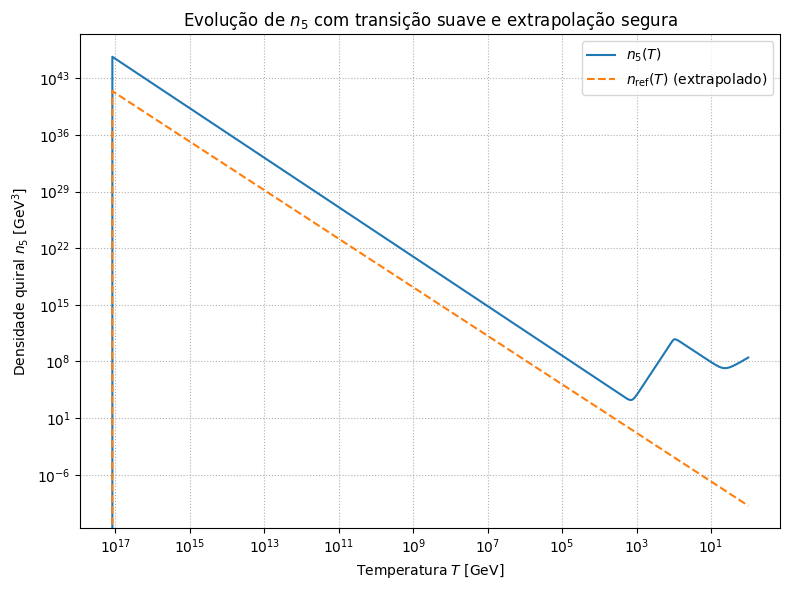

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import zeta

# --- constantes e parâmetros ---
Mpl         = 1.22e19        # escala de Planck [GeV]
hbar_c      = 6.582e-25      # ħ em GeV·s
g_star_const= 106.75         # graus de liberdade efetivos (constante)
S0_initial  = 1.0e-7           # amplitude inicial do campo axial S_z
delta      = 1e-10           # tolerância para saturar S perto de desligamento
T_off      = 100.0           # GeV: temperatura de transição suave para desligar S
eta_B      = 6e-10           # assimetria baryônica
alpha      = 0.5             # fração de dissipação do termo S0 * Gamma
k_max      = 4               # truncamento do somatório
const_M    = 1e-2            # Constante que multiplica Mpl
M_torsion  = const_M * Mpl    # Massa do campo de torção [GeV]

# Função de graus de liberdade (constante para evitar saltos)
def g_star(T):
    return g_star_const

# Mapear temperatura <-> tempo em radiação dominante
def t_of_T(T):
    return 0.301/np.sqrt(g_star_const) * Mpl / T**2 * hbar_c

def T_of_t(t, T_init, t_init):
    return T_init * (t_init / t)**0.5

# Parâmetro de Hubble em 1/s

def H(T):
    return (1.66 * np.sqrt(g_star_const) * T**2 / Mpl) / hbar_c

# Densidade de fótons de referência

def n_gamma(T):
    return 2 * zeta(3) / np.pi**2 * T**3

# Taxa de produção de pares (modo m->0) truncada

def Gamma_prod(S, E, k_max, T):
    if E <= 0 or T <= 0:
        return 0.0
    ks = np.arange(1, k_max+1)
    exps = np.exp(ks * np.pi * S**2 / E)
    phases = np.cos(ks * np.pi * np.sqrt(1 + 4*S**4/E**2))
    terms = ((-1)**ks / ks**2) * phases * exps
    return (E**2/(4*np.pi**3)) * np.sum(terms) * np.tan(S/T)

# Função de transição suave (tanh) ao redor de T_off

def smooth_switch(T, T0=T_off, width=10.0):
    # varia de 1 (T>>T_off) a 0 (T<<T_off)
    return 0.5 * (1 + np.tanh((T - T0) / width))

# Evolução por Euler com termodinâmica cosmológica e dissipação suave

def evolve_n5(T_initial, T_final, n5_initial, E_s_initial, Sz_initial, M, k_max, Nsteps=5000):
    t_init = t_of_T(T_initial)
    t_vals = np.logspace(np.log10(t_init), np.log10(t_of_T(T_final)), Nsteps)

    n5 = np.zeros(Nsteps)
    nref = np.zeros(Nsteps)
    E_s = np.zeros(Nsteps)
    Sz  = np.zeros(Nsteps)
    S0  = np.zeros(Nsteps)

    n5[0], E_s[0], Sz[0], S0[0] = n5_initial, E_s_initial, Sz_initial, 0.0

    for i in range(1, Nsteps):
        dt = t_vals[i] - t_vals[i-1]
        T_prev = T_of_t(t_vals[i-1], T_initial, t_init)
        H_prev = H(T_prev)
        switch = smooth_switch(T_prev)

        Gamma = Gamma_prod(Sz[i-1], E_s[i-1], k_max, T_prev) * switch

        # continuidade quiral com diluição
        dn5 = Gamma - 3*H_prev * n5[i-1]
        n5[i] = n5[i-1] + dn5 * dt

        # componente temporal S0
        dS0 = n5[i-1] * switch
        S0[i] = S0[i-1] + dS0 * dt

        # dissipação do modo Sz debita da energia axial (massa)
        E_diss = alpha * S0[i-1] * Gamma * dt
        Sz2 = max(Sz[i-1]**2 - 2*E_diss/M**2, 0.0)
        Sz[i] = np.sqrt(Sz2)

        # atualização de E_s via Proca
        dEs = M**2 * Sz[i] * switch
        E_s[i] = E_s[i-1] + dEs * dt

        # densidade de referência baseada em T_final seguro
        nref[i] = eta_B * n_gamma(T_prev)

    T_vals = T_of_t(t_vals, T_initial, t_init)
    return T_vals, n5, nref

# Determina escala segura de extrapolação: onde nref cruza o valor inicial de n5 atual

def find_safe_T(T_vals, n5_vals, nref_vals):
    # assume n5 no fim define limite de extrapolação
    n5_end = n5_vals[-1]
    idx = np.where(nref_vals <= n5_end)[0]
    return T_vals[idx[0]] if idx.size>0 else T_vals[-1]

# Parâmetros e execução
T_i, T_f = M_torsion, 1.0
T_vals, n5_vals, nref_vals = evolve_n5(T_i, T_f, 0.0, 0.0, S0_initial, M_torsion, k_max)
T_safe = find_safe_T(T_vals, n5_vals, nref_vals)
print(f"Escala segura de extrapolação: {T_safe:.2e} GeV")

# Plot
plt.figure(figsize=(8,6))
plt.loglog(T_vals, n5_vals, label=r'$n_5(T)$')
# para nref, só plotar abaixo de T_safe
mask = T_vals <= T_safe
plt.loglog(T_vals[mask], nref_vals[mask],'--', label=r'$n_{\rm ref}(T)$ (extrapolado)')
plt.xlabel('Temperatura $T$ [GeV]')
plt.ylabel('Densidade quiral $n_5$ [GeV$^3$]')
plt.title('Evolução de $n_5$ com transição suave e extrapolação segura')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

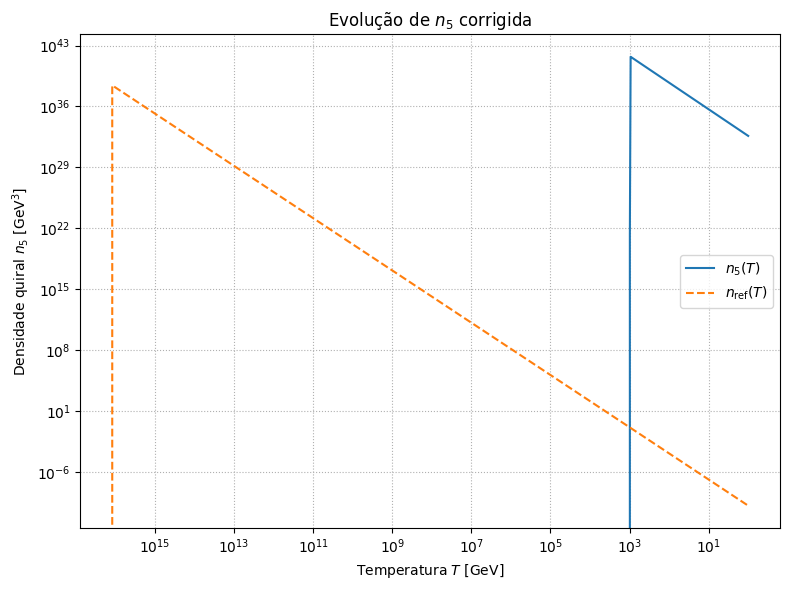

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import zeta

# --- constantes e parâmetros ---
Mpl         = 1.22e19       # escala de Planck [GeV]
hbar_c      = 6.582e-25     # ħ em GeV·s
g_star      = 106.75        # graus de liberdade no plasma
eta_B       = 6e-10         # assimetria baryônica
alpha       = 0.5           # fração de dissipação
S0_initial  = 1.0e-7           # amplitude inicial do campo axial S_z [GeV]
T_switch    = 100.0         # GeV, temperatura de início
k_max       = 4             # truncamento do somatório
const_M     = 1e-3          # Constante que multiplica Mpl
M_torsion   = const_M * Mpl  # Massa do campo de torção [GeV]

# Mapeamento T <-> t em radiação dominante
def t_of_T(T):
    return 0.301/np.sqrt(g_star) * Mpl / T**2 * hbar_c
# definir t0 antes de T_of_t
T0 = t_of_T(T_switch)
t0 = t_of_T(T_switch)
def T_of_t(t):
    return T_switch * (t0 / t)**0.5

# Hubble em unidades de 1/s
def H(T):
    return (1.66 * np.sqrt(g_star) * T**2 / Mpl) / hbar_c

# densidade de fótons de referência
def n_gamma(T):
    return 2 * zeta(3) / np.pi**2 * T**3

# produção de pares (limite m->0) truncada
def Gamma_prod(S, E, k_max, T):
    # substitua pela sua expressão correta
    if E <= 0 or T <= 0:
        return 0.0
    ks = np.arange(1, k_max+1)
    exps = np.exp(ks * np.pi * S**2 / E)
    phases = np.cos(ks * np.pi * np.sqrt(1 + 4*S**4/E**2))
    terms = ((-1)**ks / ks**2) * phases * exps
    return (E**2/(4*np.pi**3)) * np.sum(terms) * np.tanh(S/T)

# Evolução por loop de tempo uniforme em t

def evolve_n5(T_initial, T_final, n5_initial, E_s_initial, Sz_initial, M, k_max):
    t_initial = t_of_T(T_initial)
    t_final = t_of_T(T_final)
    # malha em t
    t_vals = np.logspace(np.log10(t_initial), np.log10(t_final), 5000)

    # vetores de saída
    n5_vals = np.zeros_like(t_vals)
    nref_vals = np.zeros_like(t_vals)
    E_s_vals = np.zeros_like(t_vals)
    Sz_vals = np.zeros_like(t_vals)
    S0_vals = np.zeros_like(t_vals)

    # condições iniciais
    n5_vals[0] = n5_initial
    E_s_vals[0] = E_s_initial
    Sz_vals[0] = Sz_initial
    S0_vals[0] = 0.0  # componente temporal inicial

    for i in range(1, len(t_vals)):
        dt = t_vals[i] - t_vals[i-1]
        T_prev = T_of_t(t_vals[i-1])
        H_prev = H(T_prev)

        # estados anteriores
        n5 = n5_vals[i-1]
        E_s = E_s_vals[i-1]
        Sz = Sz_vals[i-1]
        S0 = S0_vals[i-1]

        # taxa de produção
        Gamma = Gamma_prod(Sz, E_s, k_max, T_prev)

        # evolução de n5 (produção - diluição)
        dn5 = Gamma - 3*H_prev*n5
        n5_vals[i] = n5 + dn5*dt

        # evolução de S0 (fonte j5^0 = n5)
        dS0 = n5
        S0_vals[i] = S0 + dS0*dt

        # dissipação de energia axial -> eletromagnético
        E_diss = alpha * S0 * Gamma * dt
        # energia axial ~ 1/2 m^2 Sz^2 + 1/2 E_s^2
        # debitamos do termo Sz^2: Sz_new = sqrt(max(Sz^2 - 2 E_diss/M^2, 0))
        Sz2_new = max(Sz**2 - 2*E_diss/M**2, 0.0)
        Sz_vals[i] = np.sqrt(Sz2_new)

        # evolução de E_s pelo campo de fonte de Proca: dE_s/dt = m^2 Sz
        dEs = M**2 * Sz
        E_s_vals[i] = E_s + dEs*dt

        # densidade de referência baryônica
        nref_vals[i] = eta_B * n_gamma(T_prev)

    # converter t->T para plot
    T_vals = T_of_t(t_vals)
    return T_vals, n5_vals, nref_vals

# parâmetros de exemplo e plot
T_initial = M_torsion #1000.0
T_final   = 1.0
n5_initial= 0.0
E_s_initial = 0.0
Sz_initial = S0_initial

T_vals, n5_vals, nref = evolve_n5(T_initial, T_final, n5_initial,
                                  E_s_initial, Sz_initial,
                                  M_torsion, k_max)

plt.figure(figsize=(8,6))
plt.loglog(T_vals, n5_vals, label=r'$n_5(T)$')
plt.loglog(T_vals, nref, '--', label=r'$n_{\rm ref}(T)$')
plt.xlabel('Temperatura $T$ [GeV]')
plt.ylabel('Densidade quiral $n_5$ [GeV$^3$]')
plt.title('Evolução de $n_5$ corrigida')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

/tmp/ipython-input-53-27462100.py:46: RuntimeWarning: overflow encountered in exp
  exps = np.exp(ks*np.pi*S**2/E)
/tmp/ipython-input-53-27462100.py:88: RuntimeWarning: overflow encountered in scalar power
  S_new = np.sqrt(Sz_new**2 + St_new**2)
/tmp/ipython-input-53-27462100.py:85: RuntimeWarning: overflow encountered in scalar power
  Sz_new = (Szprev*dilution - ESprev * dt)**2
/tmp/ipython-input-53-27462100.py:47: RuntimeWarning: overflow encountered in scalar power
  phases = np.cos(ks*np.pi*np.sqrt(1+4*S**4/E**2))
/tmp/ipython-input-53-27462100.py:49: RuntimeWarning: overflow encountered in scalar power
  return (E**2/(4*np.pi**3))*np.sum(terms)*np.tanh(S/T)
/tmp/ipython-input-53-27462100.py:85: RuntimeWarning: invalid value encountered in scalar subtract
  Sz_new = (Szprev*dilution - ESprev * dt)**2


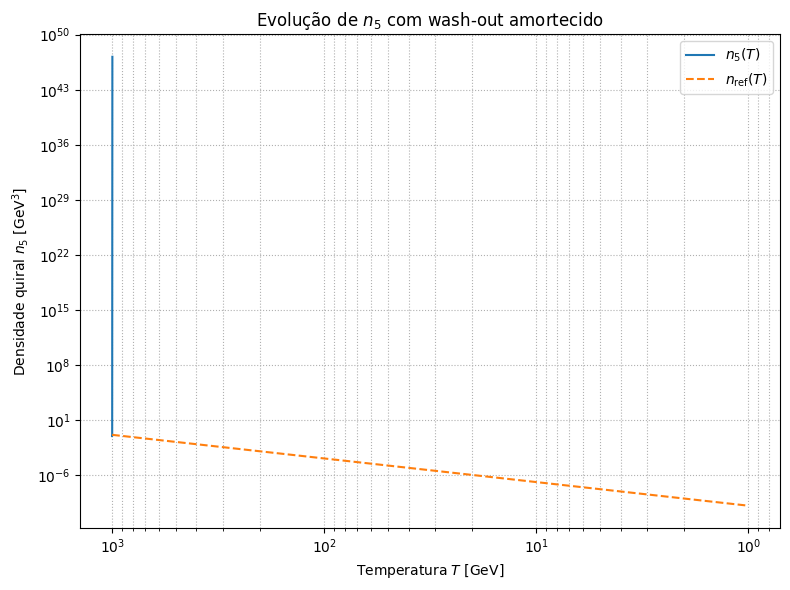

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.special import zeta

# --- constantes e parâmetros ---
Mpl         = 1.22e19                   # escala de Planck [GeV]
hbar_c      = 6.582e-25                 # ħ em GeV·s
g_star      = 106.75                    # graus de liberdade no plasma
eta_B       = 6e-10                     # assimetria baryônica
gamma_relax = 5.0                       # intensidade do wash‑out (ajustar)
S0          = 1                         # amplitude do campo axial [GeV]
T_switch    = 100.0                     # GeV, ponto de desligamento do pulso
k_max       = 4                         # truncamento do somatório
const_M     = 1e-2                       # Constante que multiplica Mpl para gerar M_torção
M_torsion   = const_M * Mpl             # Massa do campo de torção
kappa       = 1e-2                      # Amortecimento do wash-out
T0          = 1000                       # GeV Temperatura inicial

# relação T<->t em radiação dominante
def t_of_T(T):
    return 0.301/np.sqrt(g_star) * Mpl / T**2 * hbar_c

t0 = t_of_T(T0)

def T_of_t(t):
    return T0 * (t0/t)**0.5
# Fator de escala como função da temperatura
def H(T):
    return (1.66 * np.sqrt(g_star) * T**2 / Mpl)/hbar_c

# Para cálculo do n_5 de referência
def n_gamma(T):
    return 2*zeta(3)/np.pi**2 * T**3

# produção de pares (limite m->0) truncada em k_max termos
def Gamma_prod(S, E, k_max,T):
    if E<1e-20:
      return 0.0
    elif 1/T < 1e-20:
      return 0
    elif S<1e-20 and E>1e-20:
      return (E**2)/(24 * np.pi)*np.tanh(me/T)
    else:
      ks = np.arange(1,k_max+1)
      exps = np.exp(ks*np.pi*S**2/E)
      phases = np.cos(ks*np.pi*np.sqrt(1+4*S**4/E**2))
      terms = ((-1)**ks / ks**2)*phases*exps
      return (E**2/(4*np.pi**3))*np.sum(terms)*np.tanh(S/T)

def dn5_dt(t, n5, E,S, k_max):
    T = T_of_t(t)
    gamma_prod = Gamma_prod(S, E, k_max, T)
    dn5 = (gamma_prod)
    return dn5

def evolve_n5(T_initial, T_final, n5_initial, ES_initial, S_initial, M, k_max):
    t_initial = t_of_T(T_initial)
    t_final = t_of_T(T_final)
    t_vals = np.logspace(np.log10(t0), np.log10(t_final), 10000)
    T_vals  = T_of_t(t_vals)
    n5_vals = [n5_initial]
    ES = [ES_initial]
    Sz = [S_initial]
    St = [0.0]
    S = [abs(S_initial)]
    dS = [0.0]
    nref_vals = eta_B * n_gamma(T_vals)
    for i in range(1, len(t_vals)):
        t_prev = t_vals[i - 1]
        Tprev = T_vals[i-1]
        t_curr = t_vals[i]
        Sprev = S[i-1]
        dSprev = dS[i-1]
        Stprev = St[i-1]
        Szprev = Sz[i-1]
        ESprev = ES[i-1]
        n5_prev = n5_vals[i-1]
        dt = t_curr - t_prev
        dilution = 1.0 - 3.0*H(T_of_t(t_prev))*dt
        dn5 = Gamma_prod(Sprev, ESprev, k_max, Tprev) # dn5_dt(t_prev, n5_vals[-1], ES, S)
        n5_new = n5_prev*dilution + dn5 * dt
        dE = Szprev * M**2
        E_new = ESprev*dilution + dE * dt #- 0.5*Stprev*dn5
        Sz_new = (Szprev*dilution - ESprev * dt)**2
        dSnew = dSprev*dilution + (Stprev*M**2)*dt + n5_new
        St_new = Stprev*dilution + dSprev * dt
        S_new = np.sqrt(Sz_new**2 + St_new**2)
        S.append(S_new)
        dS.append(dSnew)
        Sz.append(Sz_new)
        St.append(St_new)
        ES.append(E_new)
        n5_vals.append(n5_new)
    return t_vals, T_vals, np.array(n5_vals), nref_vals

n5_initial = 1e-1
Tf = 1.0
Ei = 0.0
t0 = t_of_T(T0) # Instante inicial do tempo

t_vals, T_vals, n5_vals, nref = evolve_n5(1000, Tf, n5_initial, Ei, S0, M_torsion, k_max)

# plot
plt.figure(figsize=(8, 6))
plt.loglog(T_vals, n5_vals,  label=r'$n_5(T)$')
plt.loglog(T_vals, nref,'--',label=r'$n_{\rm ref}(T)$')
plt.xlabel('Temperatura $T$ [GeV]')
plt.ylabel('Densidade quiral $n_5$ [GeV$^3$]')
plt.title('Evolução de $n_5$ com wash-out amortecido')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

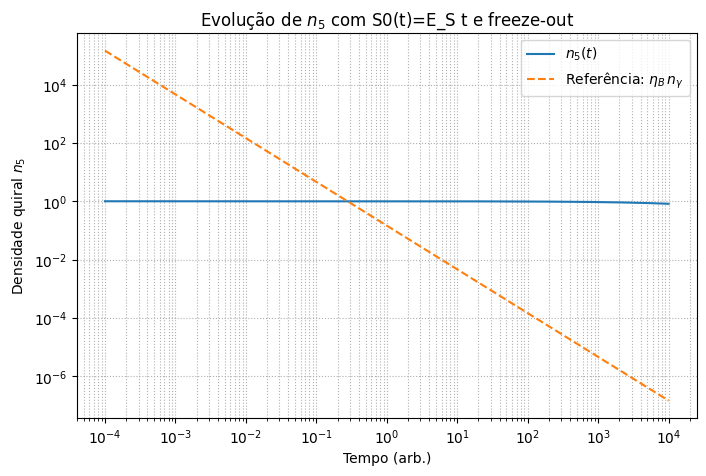

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.special import zeta

# Parâmetros fundamentais
Mpl = 1.22e19  # Massa de Planck em GeV
g_star = 106.75  # graus de liberdade efetivos relativísticos no plasma primordial
eta_B = 6e-10  # assimetria bariônica observada
E_S = 1e-8           # "campo elétrico axial" constante (unidades GeV^2)

# Função de Hubble em radiação dominante (FLRW plano, k=0)
def H(T):
    # H = 1.66 * sqrt(g_star) * T^2 / Mpl
    return 1.66 * np.sqrt(g_star) * T**2 / Mpl

# Perfil T(t) aproximado (radiação dominante: T ∝ 1/a ∝ t^{-1/2})
def T_of_time(t, T0=1e3, t0=1.0):
    # Normalização arbitrária: em t0, T=T0
    return T0 * (t0 / t)**0.5

# Densidade de fótons do CMB no tempo t
def n_gamma(T):
    # n_gamma = 2 ζ(3)/π^2 * T^3
    return 2 * zeta(3) / np.pi**2 * T**3

# Taxa de criação de pares (placeholder)
def Gamma_prod(T, S0):
    # troquei o coeficiente de 0.1 para 0.01 e adicionei prefator S0^2
    return (S0**2 + 1e-12) * np.exp(-np.pi*(0.01*T)**2/(S0+1e-10))

# Taxa de wash-out simplificada: ~1e-6 * T
def Gamma_wash(T):
    return 1e-6 * T

# Evolução de S0 (podemos tratá-lo fixo ou com algum perfil)
def S0_of_time(t, t0=1e-4, S0_init=0.0):
    return S0_init + E_S * (t - t0)

# Equação de Boltzmann para n5
def dn5_dt(n5, t):
    T = T_of_time(t)
    S0 = S0_of_time(t)
    prod = Gamma_prod(T, S0)
    wash_rate = Gamma_wash(T)
    # freeze-out: se wash_rate < H, anulamos a lavagem
    wash_term = wash_rate * n5 if wash_rate >= H(T) else 0.0
    dilution = 3 * H(T) * n5
    return prod - wash_term - dilution

t_init, t_final = 1e-4, 1e4
n5_init = 1.0
t_array = np.logspace(np.log10(t_init), np.log10(t_final), 500)
n5_array = odeint(dn5_dt, n5_init, t_array).flatten()

# Curva de referência n5_ref = eta_B * n_gamma(T)
T_array = T_of_time(t_array)
n5_ref = eta_B * n_gamma(T_array)

# Plot
plt.figure(figsize=(8,5))
plt.loglog(t_array, n5_array, label=r'$n_5(t)$')
plt.loglog(t_array, n5_ref, '--', label=r'Referência: $\eta_B\,n_\gamma$')
plt.xlabel('Tempo (arb.)')
plt.ylabel('Densidade quiral $n_5$')
plt.title('Evolução de $n_5$ com S0(t)=E_S t e freeze-out')
plt.legend()
plt.grid(True, which="both", ls=":")
plt.show()


<ipython-input-126-0a2f71980f90>:8: RuntimeWarning: invalid value encountered in sqrt
  termo = termo + (((-1.0)**k)/(k*k))*np.cos(k*np.pi*np.sqrt(1.0 - s2*137.0/(eE*eE)))*np.exp(-np.pi*k/eE)
<ipython-input-126-0a2f71980f90>:22: RuntimeWarning: invalid value encountered in scalar power
  termo = termo + (((-1.0)**k)/(k*np.sinh(np.pi*k*nB/eE)))*np.cos(k*np.pi*np.sqrt(1.0 + (nB*nB - 4.0*s2)/(eE*eE)))**np.exp(-np.pi*k/eE)


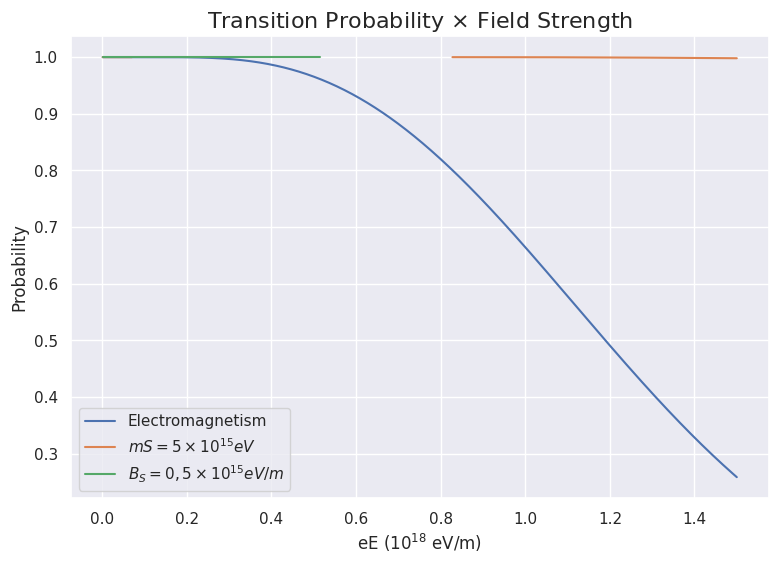

In [ ]:
def zetaconstm(s2,eE,n):
  k = 1
  termo = 0
  if (1.0 - s2/(eE*eE))<=0.0:
    return 0.0
  else:
    while k < n:
      termo = termo + (((-1.0)**k)/(k*k))*np.cos(k*np.pi*np.sqrt(1.0 - s2*137.0/(eE*eE)))*np.exp(-np.pi*k/eE)
      k = k+1
      if termo < 0.0:
        termo = 0.0
  return termo

def zetadynm(nB,s2,eE,n):
  k = 1
  termo = 0
  if 1.0 + (nB*nB - 4.0*s2)/(eE*eE)<=0.0:
      termo = 0.0
      return termo
  else:
    while k < n:
      termo = termo + (((-1.0)**k)/(k*np.sinh(np.pi*k*nB/eE)))*np.cos(k*np.pi*np.sqrt(1.0 + (nB*nB - 4.0*s2)/(eE*eE)))**np.exp(-np.pi*k/eE)
      k = k+1
      if termo < 0.0:
        termo = 0.0
    return termo

def zetabigm(nB,eE,n):
  k = 1
  termo = 0
  while k < n:
    termo = termo + (((-1.0)**k)/(k*np.sinh(np.pi*k*nB/eE)))*np.cos(k*np.pi/eE)*np.exp(-np.pi*k/eE)
    if termo <= 0.0:
      return 0.0
    k = k+1
  return termo

pi3 = np.pi**3 # Pi ao cubo
pi2 = np.pi**2 # Pi quadrado
eE = np.linspace(0.001,1.5,1000) # produto da carga com o campo (vai de 0 a 1 multiplicando a potência)
nB = 0.01
nBdom = 0.1
s2 = 0.005
bigS2 = 0.05
prob = [] # Probabilidade para o Campo Elétrico
probSconst = [] # Probabilidade para vetor axial constante
probSdyn = [] # Probabilidade para vetor axial dinâmico
ProbbigS = [] # Probabilidade para vetor axial 'forte'
for j in eE:
  G = np.exp((-j*j)*(spence(1.0-np.exp(-1.0/j)))) # Taxa de produção de pares
  prob.append(G) # Anexa a probabilidade para um dado j
  GSconst = np.exp(-(j*j)/(4.0*pi3)*zetaconstm(s2,j,2)) # Taxa de produção de pares
  probSconst.append(GSconst) # Anexa a probabilidade para um dado j
  GSdyn = np.exp((-(j*nB)/(4.0*pi2))*zetadynm(nB,bigS2,j,2))
  probSdyn.append(GSdyn)
  #GSbig = np.exp((-(TV*j*nBdom*pot)/(c*h*np.pi*137.0))*zetabigm(melec2,nBdom,j*pot,2))
  #ProbbigS.append(GSbig)

# Gera o gráfico
plt.figure(1, figsize=(9,6))
plt.plot(eE, prob, label='Electromagnetism')
plt.plot(eE, probSconst, label=(r'$mS = 5\times10^{15} eV$'))
plt.plot(eE, probSdyn, label=(r'$B_S = 0,5\times10^{15} eV/m$'))
#plt.plot(eE, ProbbigS, label=(r'$B_S = 10\times10^{18} eV/m$'))
plt.legend()
plt.title(r'Transition Probability $\times$ Field Strength', fontsize=16)
plt.xlabel(r'eE ($10^{18}$ eV/m)')
plt.ylabel(r'Probability')
plt.show()